In [1]:
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import hist
from hist import Hist
import awkward as ak
from math import sqrt
from numba import njit

In [2]:
with uproot.open("/N/project/ceem_coherent/CENNS750/sim_out/1500954/test_01_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    genz = cenns['genz'].array()
    genx = cenns['genx'].array()
    geny = cenns['geny'].array()

In [3]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genx": genx, "geny": geny, "genz": genz}, depth_limit=1)

In [4]:
def cut1(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    # if sqrt(event['genx']**2 + event['geny']**2 + event['genz']**2) > 100.0:
    #     return -1
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return np.sum(ly)
    else:
        return -1

In [5]:
vals = [cut1(event) for event in z]

KeyboardInterrupt: 

In [ ]:
ly = Hist(hist.axis.Regular(75, 0, 750))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("200 keV Ar40 Recoils")
ax.set_xlabel("Total detected photons")
ax.text(100, 2500, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ly.plot(ax=ax)

In [54]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_200keVnr_totalPEs.png")

In [ ]:
def cut2(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return len(event['chans'])
    else:
        return -1

In [ ]:
vals = [cut2(event) for event in z]

In [ ]:
pmt = Hist(hist.axis.Regular(40, 0, 123, name="Total PMTs hit"))
pmt.fill(vals)
fig, ax = plt.subplots()
ax.set_title("200 keV Ar40 Recoils")
ax.text(20, 2000, f'Entries: {np.sum(pmt.values()):.0f}')
pmt.plot(ax=ax)

In [58]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_200keVnr_totalhits.png")

In [18]:
def cut3(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return np.max(ly)
    else:
        return -1

In [19]:
vals = [cut3(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb39c4fd3c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

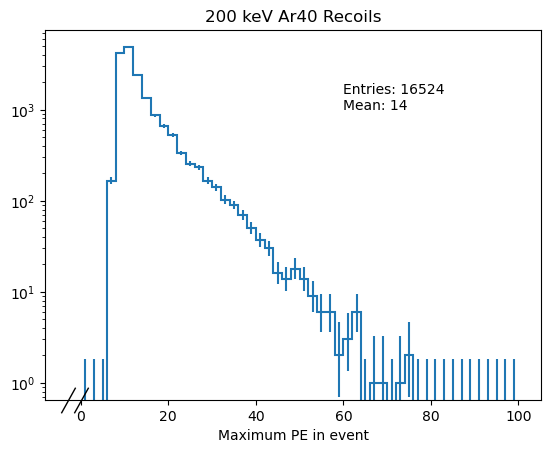

In [20]:
pmt = Hist(hist.axis.Regular(50, 0, 100, name="Maximum PE in event"))
pmt.fill(vals)
fig, ax = plt.subplots()
ax.set_title("200 keV Ar40 Recoils")
ax.set_yscale('log')
ax.text(60, 1000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

In [69]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_200keVnr_maxPEs.png")

In [6]:
def cut4(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return np.array([-1])
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return ly
    else:
        return np.array([-1])

In [7]:
#%%timeit
vals = [cut4(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe39869bf70>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

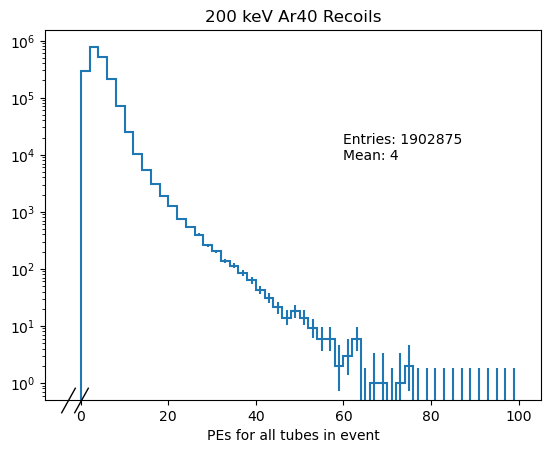

In [8]:
pmt = Hist(hist.axis.Regular(50, 0, 100, name="PEs for all tubes in event"))
for val in vals:
    pmt.fill(val)
fig, ax = plt.subplots()
ax.set_title("200 keV Ar40 Recoils")
ax.set_yscale('log')
ax.text(60, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

7.000000000000001


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe359328a90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

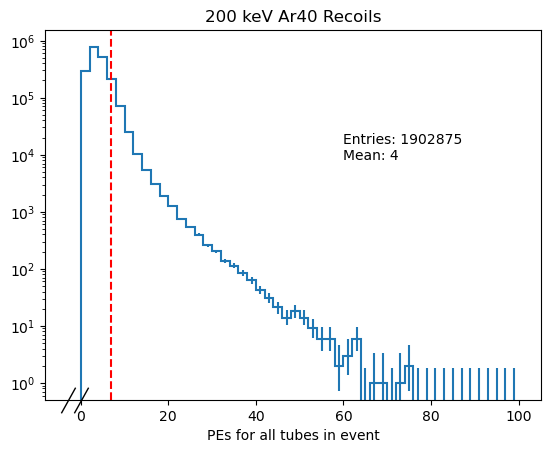

In [10]:
total = pmt.sum()
idx = np.argmin(np.abs(1e-1 - (1 - np.add.accumulate(pmt.values()) / total)))
cutoff = pmt.axes[0].centers[idx]
print(cutoff)
fig, ax = plt.subplots()
ax.set_title("200 keV Ar40 Recoils")
ax.set_yscale('log')
ax.text(60, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
ax.axvline(cutoff, color='red', ls='dashed')
pmt.plot(ax=ax)

In [43]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_200keVnr_allPEs.png")

Add in timing information to the plots

In [4]:
def cut5(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    # if sqrt(event['genx']**2 + event['geny']**2 + event['genz']**2) > 100.0:
    #     return -1
    if abs(event['genz']) > 417.53:
        return None
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return ak.flatten(event['chans'])
    else:
        return None

In [5]:
vals = [cut5(event) for event in z]

In [6]:
vals = list(filter(lambda x: x is not None, vals))

In [7]:
total_pes = [i[0] for i in vals]
times = [i[1] for i in vals]

In [27]:
pestimes = Hist(hist.axis.Regular(100, 0, 500, name="T", label="Photon arrival time [ns]"))
for val in vals:
    pestimes.fill(val)

In [28]:
h, e = pestimes.to_numpy()

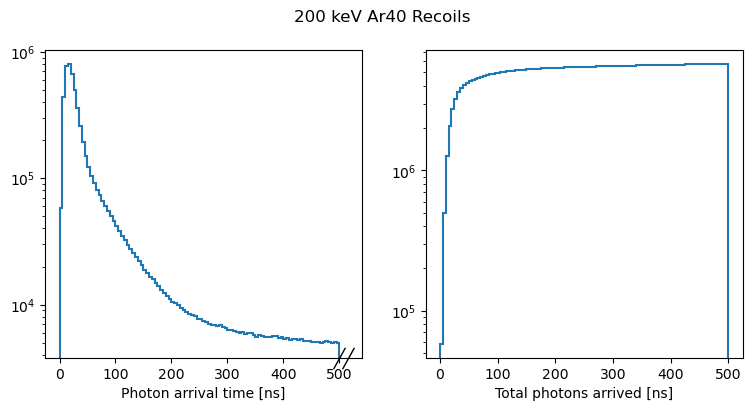

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
fig.suptitle('200 keV Ar40 Recoils')
ax[0].set_yscale('log')
pestimes.plot(ax=ax[0])
ax[1].set_yscale('log')
ax[1].set_xlabel('Total photons arrived [ns]')
ax[1].stairs(np.add.accumulate(h), edges=e, lw=1.5)
# pestimes.plot2d(ax=ax[1], norm=colors.LogNorm(vmin=1, vmax=np.max(pestimes.values()), clip=True))

In [31]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_200keVnr_allPEtimes.png")

Want to restrict the time of photon arrival to the first 90 ns

In [11]:
def cut6(event):
    ly = np.array([len(chan[chan < 90]) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return np.array([-1])
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return ly
    else:
        return np.array([-1])

In [12]:
vals = [cut6(event) for event in z]

KeyboardInterrupt: 

In [ ]:
pmt = Hist(hist.axis.Regular(50, 0, 100, name="PEs (< 90 ns) for all tubes in event"))
for val in vals:
    pmt.fill(val)
fig, ax = plt.subplots()
ax.set_title("200 keV Ar40 Recoils")
ax.set_yscale('log')
ax.text(60, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

In [ ]:
total = pmt.sum()
idx = np.argmin(np.abs(1e-2 - (1 - np.add.accumulate(pmt.values()) / total)))
cutoff = pmt.axes[0].centers[idx]
print(cutoff)
fig, ax = plt.subplots()
ax.set_title("200 keV Ar40 Recoils")
ax.set_yscale('log')
ax.text(60, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
ax.axvline(cutoff, color='red', ls='dashed')
pmt.plot(ax=ax)

In [47]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_200keVnr_90ns_allPEs.png")

Trying to make a 2D histogram of total photons detected vs. time

In [11]:
@jit
def cut7(genz, chans, low, high):
    if abs(genz) > 417.53:
        return -1
    elif len(chans) > 0:
        # total_ph = event['chans'][(event['chans'] > low) & (event['chans'] < high)]
        sum = 0
        for chan in chans:
            for ph in chan:
                if ph < high:
                    sum +=1
        return sum
    else:
        return -1

In [14]:
pestimes = Hist(hist.axis.Regular(75, 0, 750), hist.axis.Regular(1000, 0, 10000))
e = pestimes.axes[1].edges
b = pestimes.axes[1].centers
for i in range(len(e) - 1):
# for i in range(1):
    vals = [cut7(event['genz'], event['chans'], e[i], e[i+1]) for event in z]
    pestimes.fill(vals, b[i])

In [21]:
@njit
def fill_vals(events):
    lys = []
    for event in events:
        if abs(event['genz']) > 417.52:
            continue
        ly = []
        good_tops = []
        good_bots = []
        for top, chan in zip(event['top'], event['chans']):
            if top and len(chan) > 2:
                good_tops.append(True)
            elif top:
                good_tops.append(False)
            elif not top and len(chan) > 2:
                good_bots.append(True)
            elif not top:
                good_bots.append(False)
            total = 0
            for t in chan:
                if t < 90:
                    total += 1
            ly.append(total)
            # ly.append(len(chan))
        if np.any(np.array(good_tops)) and np.any(np.array(good_bots)):
            lys.append(ly)
    return lys

In [22]:
vals = fill_vals(z)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f5b61dda390>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

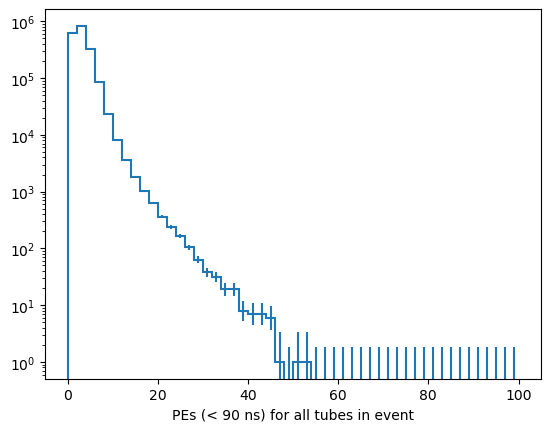

In [23]:
pmt = Hist(hist.axis.Regular(50, 0, 100, name="PEs (< 90 ns) for all tubes in event"))
for val in fill_vals(z):
    pmt.fill(val)
plt.yscale('log')
pmt.plot()

5.0


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f5b61e2c140>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

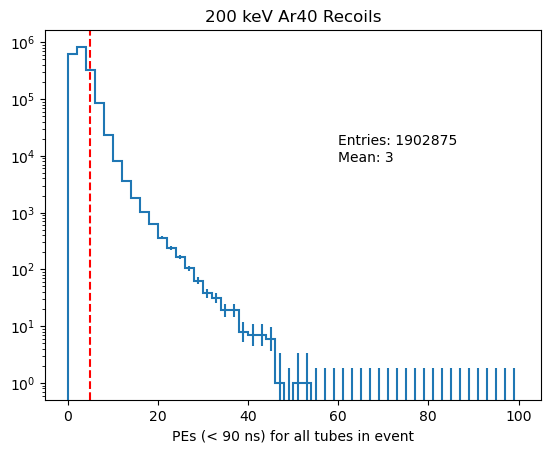

In [24]:
total = pmt.sum()
idx = np.argmin(np.abs(1e-1 - (1 - np.add.accumulate(pmt.values()) / total)))
cutoff = pmt.axes[0].centers[idx]
print(cutoff)
fig, ax = plt.subplots()
ax.set_title("200 keV Ar40 Recoils")
ax.set_yscale('log')
ax.text(60, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
ax.axvline(cutoff, color='red', ls='dashed')
pmt.plot(ax=ax)

In [14]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/200keVnr_PEs_90percutoff.png")